In [3]:
import pandas as pd 
df=pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
categorical_cols= ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[categorical_cols] = df[categorical_cols].replace(0, pd.NA)
df_clean = df.fillna(df.median())


C:\Users\vinot\AppData\Local\Temp\ipykernel_16520\1796111876.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df.fillna(df.median())


In [11]:
df_clean["AgeGroup"] = pd.cut(df_clean["Age"], bins=[20,30,40,50,60,70,80,90], 
                              labels=["20-29","30-39","40-49","50-59","60-69","70-79","80-89"])
df_clean["BMI_Category"] = pd.cut(df_clean["BMI"], bins=[0,18.5,25,30,35,40,100], 
                                  labels=["Underweight","Normal","Overweight","Obese I","Obese II","Obese III"])


C:\Users\vinot\AppData\Local\Temp\ipykernel_16520\1563889715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette="Set2", order=df_clean[col].cat.categories)


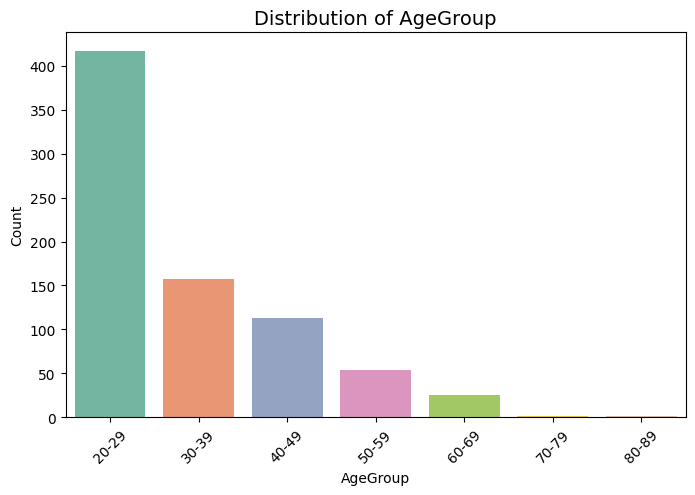

C:\Users\vinot\AppData\Local\Temp\ipykernel_16520\1563889715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette="Set2", order=df_clean[col].cat.categories)


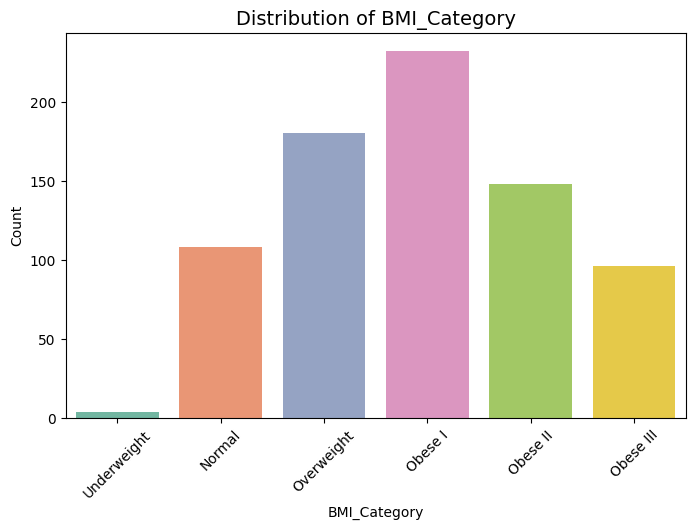

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Categorical columns to visualize
categorical_cols = ["AgeGroup", "BMI_Category"]

for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, data=df_clean, palette="Set2", order=df_clean[col].cat.categories)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


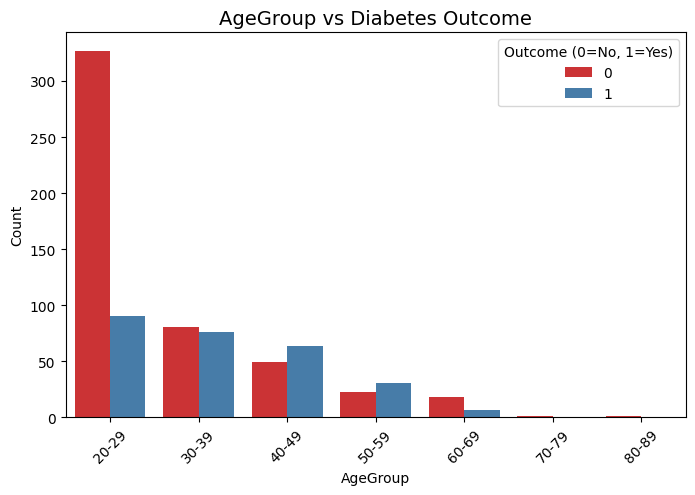

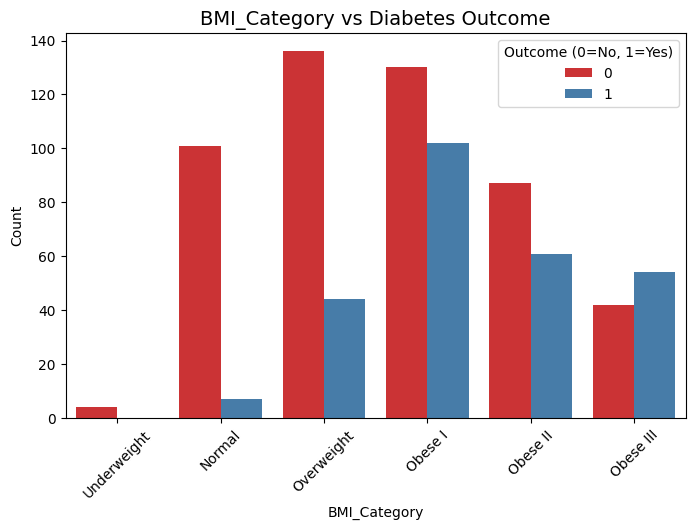

In [13]:
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=col, hue="Outcome", data=df_clean, palette="Set1", order=df_clean[col].cat.categories)
    plt.title(f"{col} vs Diabetes Outcome", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Outcome (0=No, 1=Yes)")
    plt.show()


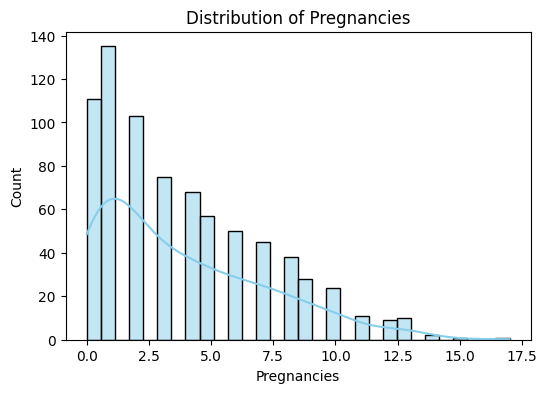

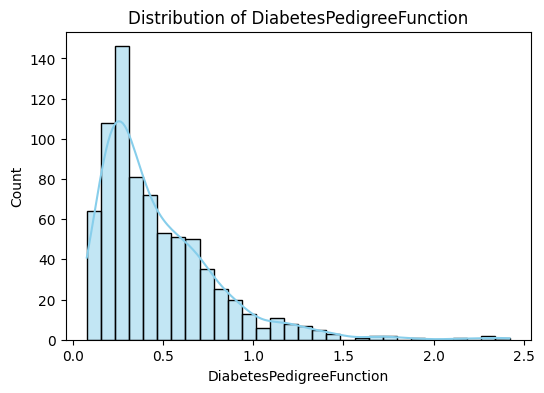

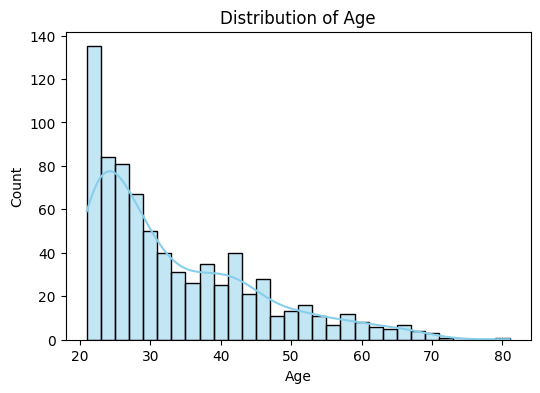

Pregnancies skewness: 0.90
DiabetesPedigreeFunction skewness: 1.92
Age skewness: 1.13


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# numeric columns (exclude target Outcome)
numeric_cols = df.select_dtypes(include=['float64','int64']).columns.drop("Outcome")

# Histograms with KDE
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# Print skewness values
for col in numeric_cols:
    print(f"{col} skewness: {df[col].skew():.2f}")


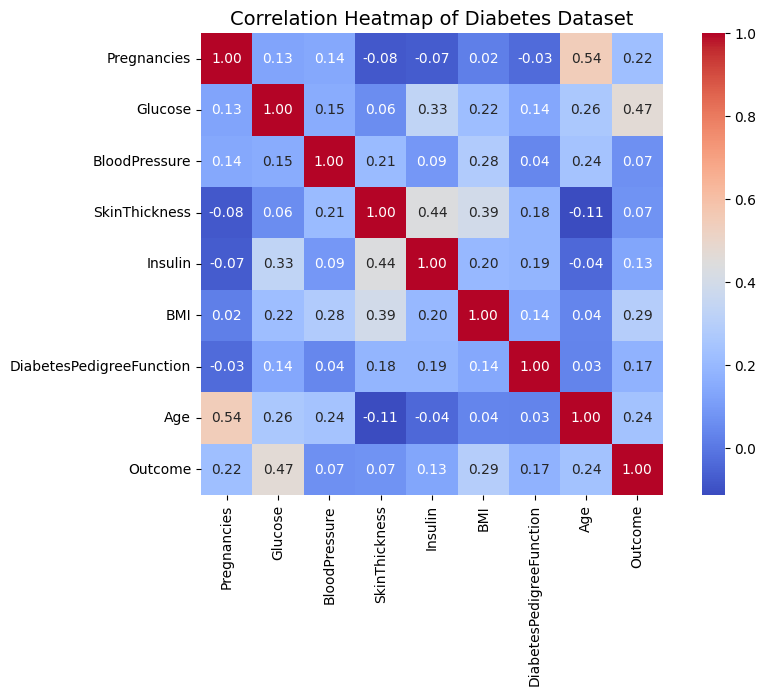

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("diabetes.csv")

# Compute correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Diabetes Dataset", fontsize=14)
plt.show()



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,  RocCurveDisplay
from xgboost import XGBClassifier

In [18]:
# Features and Target
X = df.drop("Outcome", axis=1)   
y = df["Outcome"]                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (614, 8)
Testing shape: (154, 8)


In [19]:
xgb_clf = XGBClassifier( eval_metric="logloss", random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

print("Initial Accuracy:", accuracy_score(y_test, y_pred))


Initial Accuracy: 0.7207792207792207


In [20]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(xgb_clf, X, y, cv=cv, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validation Accuracy Scores: [0.74675325 0.77272727 0.75974026 0.74509804 0.7124183 ]
Mean CV Accuracy: 0.747347423818012


In [21]:
param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 200, 300]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier( eval_metric="logloss", random_state=42),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Best CV Score: 0.7785285885645742


In [22]:
best_xgb = grid_search.best_estimator_

best_xgb.fit(X_train, y_train)
y_pred_final = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:,1]


In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall:", recall_score(y_test, y_pred_final))
print("F1 Score:", f1_score(y_test, y_pred_final))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))



Accuracy: 0.7467532467532467
Precision: 0.6428571428571429
Recall: 0.6545454545454545
F1 Score: 0.6486486486486487
ROC-AUC: 0.8224058769513315


In [25]:
import pickle

# Save the best model
with open("model.pkl", "wb") as file:
    pickle.dump(best_xgb, file)

print("model.pkl")


model.pkl
